## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.groupby('group')['landing_page'].value_counts()

group      landing_page
control    old_page        145274
           new_page          1928
treatment  new_page        145311
           old_page          1965
Name: landing_page, dtype: int64

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
treatment_oldpage = df.query('group == "treatment" and landing_page != "new_page"')
control_newpage = df.query('group == "control" and landing_page != "old_page"')

df1 = df.drop(treatment_oldpage.index)
df2 = df1.drop(control_newpage.index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

In [11]:
df2.shape

(290585, 5)

b. There is one **user_id** repeated in **df2**.  What is it?

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop_duplicates('user_id')
df2.shape

(290584, 5)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
p_converting = df2[df2['converted'] == 1].shape[0] / df2.shape[0]
p_converting

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
p_control = df2.query("group == 'control' and converted == 1").count()[0]/ df2.query("group == 'control'").count()[0]
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
p_treatment = df2.query("group == 'treatment' and converted == 1").count()[0]/ df2.query("group == 'treatment'").count()[0]
p_treatment

0.11880806551510564

In [17]:
# Compute observed difference in completion rates
obs_diff = p_treatment - p_control
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [18]:
df2.query('landing_page == "new_page"').count()[0]/df2.shape[0]

0.50006194422266881

In [19]:
df2['landing_page'].value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Based on the analysis made until this point, we don't have enough to conclude that the new treatment page leads to more conversions. As our results on the treatment and control group are similar and don't have a large difference in probabilities (control group has a probability of 12% of converting and treatment group 11,8%).**

**Therefore, we need for sure to perform bootstrapping and sampling analyses to have a statistical significance and then support a change in the treatment of pages leads.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} - p_{old} \leq 0$$

$$H_1: p_{new} - p_{old} > 0$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new = len(df2[df2['group'] == 'treatment'])
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = len(df2[df2['group'] == 'control'])
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
random.seed(42)
new_page_converted = np.random.binomial(1,p_new,size = n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.binomial(1, p_old, size=n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
pnew_cv = new_page_converted.mean()
pnew_cv

0.11805794508292616

In [27]:
pold_cv = old_page_converted.mean()
pold_cv

0.12006277792309704

In [28]:
dif = pnew_cv - pold_cv
dif

-0.0020048328401708754

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
new_conversions = np.random.binomial(n_new,p_new,10000)/n_new
old_conversions = np.random.binomial(n_old,p_old,10000)/n_old
p_diffs = new_conversions - old_conversions

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

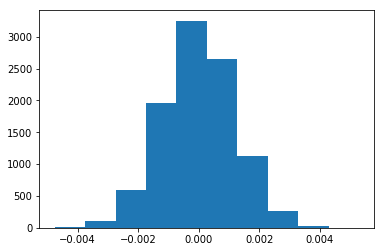

In [30]:
plt.hist(p_diffs);

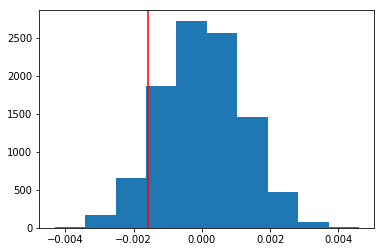

In [31]:
#Under the null
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals)
plt.axvline(obs_diff, color="red");

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
(p_diffs > (obs_diff)).mean()

0.90449999999999997

In [33]:
p_diffs.mean(), p_diffs.std()

(-8.2725942376122451e-06, 0.001203920328390897)

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This value is known as p-value, it's the probability of observing under the null hypotesis an equal or more extreme value (in favor of the alternative). In this case with type 1 error 5% and p-value is over 90% we failed to reject the null, it means that the old page rate conversion is higher than the new one.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
#convert_old
df2.query("landing_page == 'old_page' and converted == 1").count()[0]

17489

In [35]:
#convert_new
df2.query("landing_page == 'new_page' and converted == 1").count()[0]

17264

In [36]:
#n_old
df2.query("landing_page == 'old_page'").count()[0]

145274

In [37]:
#n_new
df2.query("landing_page == 'new_page'").count()[0]

145310

In [38]:
import statsmodels.api as sm

convert_old = 17489
convert_new = 17264
n_old = 145274
n_new = 145310

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [39]:
z_test, p_value = sm.stats.proportions_ztest(count=[convert_old,convert_new], nobs=[n_old,n_new], alternative = 'smaller')
print('z_test {}'.format(z_test))
print('p_value {}'.format(p_value))

z_test 1.3109241984234394
p_value 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Both values agree with findings in part j. and k. With the built in function we've got a p-value and z-test that allows us to say that we failed to reject the null hypothesis with 90% of confident.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**In this case, we should perform a Logistic Regression, as we're aiming specifically to predict whether is a conversion or no conversion. It's a categorical response.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [40]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [41]:
# Add a column in df2 for the intercept
df2['intercept'] = 1

df2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1


In [42]:
# Creating dummy variable for landing_page
df2[['new_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1


In [43]:
# Adding a column ab_page treatment = 1 and control = 0
mapper = {'control':0, 'treatment':1}
df2['ab_page'] = df2['group'].map(mapper)
df2.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [44]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 31 Jul 2019   Pseudo R-squ.:               8.077e-06
Time:                        14:30:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [58]:
np.exp(-1.9888), np.exp(-0.0150)

(0.13685955841614492, 0.98511193960306265)

In [46]:
np.exp(result.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [47]:
#decrease
1/np.exp(result.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with ab_page is 0.190. The main difference between Logistic Regression p-value and the p-value from hypothesis testing is about the attribution of it. In hypothesis testing the p-value is the probability of observing an equal or more extreme value (in favour of the alternative hypothesis) under the null, we consider that the null is true and investigate the possibilities of rejecting it. 
In Logistic Regression, we try to predict the "target", in case if the user converted or not, by the "relationship" between the independent variables and the response variable (target). In this case, the p-value represents correlation.**

$$H_0: p_{new} = p_{old}$$

$$H_1: p_{new} != p_{old}$$

**In this case, as the p-value is 0.190 (alpha > 0.05), is too high to accept the alternative, we stay with the null hypothesis.**


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding new terms into the regression model would be great in the point of view of feeding the model with more data and enabling it to perform, predict better. But by adding more features to the model, it'll be more liable to multicollinearity, that is "when two or more variables are moderately or highly correlated". Multicollinearity will break the model and lead to the wrong result.**

*Source: https://newonlinecourses.science.psu.edu/stat501/node/343/*

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [48]:
#Reading the new dataset as df_countries
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [49]:
#Joining dataframes by setting an index "user_id"
df3 = df2.set_index('user_id').join(df_countries.set_index('user_id'))
df3.head(5)

,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country
user_id,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US


In [50]:
df3.groupby('country')['converted'].value_counts()

country  converted
CA       0             12827
         1              1672
UK       0             63727
         1              8739
US       0            179277
         1             24342
Name: converted, dtype: int64

In [51]:
#Country's dummies
df3[['CA','UK','US']] = pd.get_dummies(df3['country'])
df3.head()

,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country,CA,UK,US
user_id,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US,0,0,1


In [52]:
df3.dtypes

timestamp       object
group           object
landing_page    object
converted        int64
intercept        int64
new_page         uint8
old_page         uint8
ab_page          int64
country         object
CA               uint8
UK               uint8
US               uint8
dtype: object

In [53]:
#Conversion rates
convert_CA = df3.query("country == 'CA' and converted == 1").count()[0] / df3.query("country == 'CA'").count()[0]
convert_US = df3.query("country == 'US' and converted == 1").count()[0] / df3.query("country == 'US'").count()[0]
convert_UK = df3.query("country == 'UK' and converted == 1").count()[0] / df3.query("country == 'UK'").count()[0]

print('The US conversion rate is {}'.format(convert_US))
print('The UK conversion rate is {}'.format(convert_UK))
print('The CA conversion rate is {}'.format(convert_CA))

The US conversion rate is 0.1195468006423762
The UK conversion rate is 0.12059448568984076
The CA conversion rate is 0.11531829781364232


In [69]:
#Logistic Regression point of view
new_log = sm.Logit(df3['converted'], df3[['intercept','ab_page', 'CA','US']])
result1 = new_log.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 31 Jul 2019   Pseudo R-squ.:               2.323e-05
Time:                        16:12:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

In [70]:
np.exp(result1.params)

intercept    0.138154
ab_page      0.985168
CA           0.950621
US           0.990165
dtype: float64

**As we can see above, the conversion rate doesn't suffer significant changes and p-value is larger than Type I Error rate (0.05) so it's possible to affirm that both country and page doesn't have much impact. Once again we failed to reject the null hypothesis.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [73]:
df3.head(2)

,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country,CA,UK,US
user_id,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US,0,0,1


In [75]:
#First I will multiplicate the ab_page and the countries and then put it on the model.
df3['CA_ab_page'] = df3['CA'] * df3['ab_page']
df3['UK_ab_page'] = df3['UK'] * df3['ab_page']
df3['US_ab_page'] = df3['US'] * df3['ab_page']

In [77]:
new_log2 = sm.Logit(df3['converted'], df3[['intercept', 'CA', 'US', 'ab_page', 'CA_ab_page','US_ab_page']])
result2 = new_log2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 31 Jul 2019   Pseudo R-squ.:               3.482e-05
Time:                        16:54:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
CA            -0.0118      0.040     -0.296      0.767      -0.090       0.066
US             0.0057      0.019      0.306      0.760      -0.031       0.043
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
CA_ab_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
US_ab_page    -0.0314      0.027     -1.181      0.238      -0.084       0.021
==============================================================================
"""

**By performing a model with interactions between the pages and the countries, still, don't have enough statistical significance to accept the alternative hypothesis (p-value from all variables a larger than the Type I Error).**

<a id='conclusions'></a>
## Conclusion

> Finally, by performing this A/B test study with hypothesis testing and logistic regression, therefore with all tools and ways we had, it was possible to conclude that we failed to reject the null hypothesis (the new page conversion rate is equal to or lower than old page), so we would stay with the old version of the page. 

> Although, we don't know all the business context and why the new page was created and how it would impact in the business (maybe the new page would lead to less cost or the business changed and the page needs to be changed as well). So, to have a proper conclusion all these business contexts should be considered.


In [78]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0